In [340]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
import keras
from keras.utils import np_utils
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout

In [341]:
data = load_iris()

In [342]:
X = data.data
Y = data.target

In [343]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [344]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [345]:
Y = np_utils.to_categorical(Y)

In [346]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [347]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [348]:
y_train.shape

(120, 3)

In [349]:
num_classes = 3

model = Sequential()
model.add(Dense(4, activation='tanh', input_shape=(4,), name="layer1"))
model.add(Dense(32, activation='tanh', name="layer2"))
model.add(Dense(32, activation='tanh', name="layer3"))
model.add(Dense(32, activation='relu', name="layer4"))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 4)                 20        
                                                                 
 layer2 (Dense)              (None, 32)                160       
                                                                 
 layer3 (Dense)              (None, 32)                1056      
                                                                 
 layer4 (Dense)              (None, 32)                1056      
                                                                 
 dense_41 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________


In [350]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 4)                 20        
                                                                 
 layer2 (Dense)              (None, 32)                160       
                                                                 
 layer3 (Dense)              (None, 32)                1056      
                                                                 
 layer4 (Dense)              (None, 32)                1056      
                                                                 
 dense_41 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,391
Trainable params: 2,391
Non-trainable params: 0
_________________________________________________________________


In [351]:
epochs = 400
batch_size = 256

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/400
1/1 [==============================] - 1s 679ms/step - loss: 1.1138 - accuracy: 0.2500 - val_loss: 1.0825 - val_accuracy: 0.2667
Epoch 2/400
1/1 [==============================] - 0s 32ms/step - loss: 1.0879 - accuracy: 0.3333 - val_loss: 1.0625 - val_accuracy: 0.3000
Epoch 3/400
1/1 [==============================] - 0s 30ms/step - loss: 1.0629 - accuracy: 0.3917 - val_loss: 1.0432 - val_accuracy: 0.3333
Epoch 4/400
1/1 [==============================] - 0s 30ms/step - loss: 1.0388 - accuracy: 0.4250 - val_loss: 1.0248 - val_accuracy: 0.4000
Epoch 5/400
1/1 [==============================] - 0s 31ms/step - loss: 1.0157 - accuracy: 0.5250 - val_loss: 1.0070 - val_accuracy: 0.6000
Epoch 6/400
1/1 [==============================] - 0s 29ms/step - loss: 0.9934 - accuracy: 0.6583 - val_loss: 0.9898 - val_accuracy: 0.6667
Epoch 7/400
1/1 [==============================] - 0s 30ms/step - loss: 0.9721 - accuracy: 0.7667 - val_loss: 0.9735 - val_accuracy: 0.7000
Epoch 8/400
1/1 [==

In [352]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 25ms/step - loss: 0.0275 - accuracy: 1.0000
Test loss: 0.027517681941390038
Test accuracy: 1.0


In [353]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


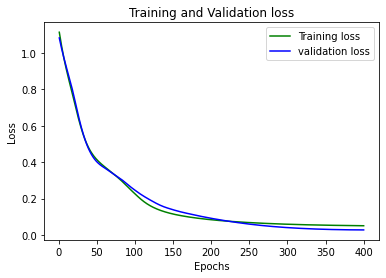

In [354]:
import matplotlib.pyplot as plt

loss_train = history.history.get('loss')
loss_val = history.history.get('val_loss')

epochs = range(1,401)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

####  L1 regularization

In [355]:
num_classes = 3
epochs = 400
batch_size = 256

model = Sequential()
model.add(Dense(4, activation='tanh', input_shape=(4,), kernel_regularizer = 'l1', name="layer1"))
model.add(Dense(32, activation='tanh', kernel_regularizer = 'l1', name="layer2"))
model.add(Dense(32, activation='tanh', kernel_regularizer = 'l1', name="layer3"))
model.add(Dense(32, activation='relu', kernel_regularizer = 'l1', name="layer4"))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer = 'l1'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
1/1 [==============================] - 1s 827ms/step - loss: 4.8538 - accuracy: 0.1500 - val_loss: 4.7605 - val_accuracy: 0.2667
Epoch 2/400
1/1 [==============================] - 0s 30ms/step - loss: 4.8099 - accuracy: 0.1500 - val_loss: 4.7209 - val_accuracy: 0.2667
Epoch 3/400
1/1 [==============================] - 0s 41ms/step - loss: 4.7672 - accuracy: 0.1583 - val_loss: 4.6827 - val_accuracy: 0.2667
Epoch 4/400
1/1 [==============================] - 0s 29ms/step - loss: 4.7257 - accuracy: 0.1750 - val_loss: 4.6464 - val_accuracy: 0.3333
Epoch 5/400
1/1 [==============================] - 0s 30ms/step - loss: 4.6850 - accuracy: 0.2417 - val_loss: 4.6113 - val_accuracy: 0.4667
Epoch 6/400
1/1 [==============================] - 0s 30ms/step - loss: 4.6455 - accuracy: 0.4167 - val_loss: 4.5772 - val_accuracy: 0.7000
Epoch 7/400
1/1 [==============================] - 0s 31ms/step - loss: 4.6072 - accuracy: 0.5167 - val_loss: 4.5440 - val_accuracy: 0.7000
Epoch 8/400
1/1 [==

In [356]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 22ms/step - loss: 0.7527 - accuracy: 0.9667
Test loss: 0.7526631951332092
Test accuracy: 0.9666666388511658


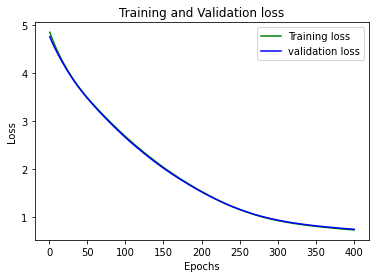

In [357]:
import matplotlib.pyplot as plt

loss_train_l1 = history.history.get('loss')
loss_val = history.history.get('val_loss')

epochs = range(1,401)
plt.plot(epochs, loss_train_l1, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

####  L2 regularization

In [358]:
num_classes = 3
epochs = 400
batch_size = 256

model = Sequential()
model.add(Dense(4, activation='tanh', input_shape=(4,), kernel_regularizer = 'l2', name="layer1"))
model.add(Dense(32, activation='tanh', kernel_regularizer = 'l2', name="layer2"))
model.add(Dense(32, activation='tanh', kernel_regularizer = 'l2', name="layer3"))
model.add(Dense(32, activation='relu', kernel_regularizer = 'l2', name="layer4"))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer = 'l2'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
1/1 [==============================] - 1s 816ms/step - loss: 1.9368 - accuracy: 0.3083 - val_loss: 1.9450 - val_accuracy: 0.2000
Epoch 2/400
1/1 [==============================] - 0s 29ms/step - loss: 1.9103 - accuracy: 0.3250 - val_loss: 1.9145 - val_accuracy: 0.2333
Epoch 3/400
1/1 [==============================] - 0s 32ms/step - loss: 1.8841 - accuracy: 0.3750 - val_loss: 1.8847 - val_accuracy: 0.3333
Epoch 4/400
1/1 [==============================] - 0s 37ms/step - loss: 1.8583 - accuracy: 0.4583 - val_loss: 1.8556 - val_accuracy: 0.4333
Epoch 5/400
1/1 [==============================] - 0s 35ms/step - loss: 1.8332 - accuracy: 0.5333 - val_loss: 1.8274 - val_accuracy: 0.4667
Epoch 6/400
1/1 [==============================] - 0s 29ms/step - loss: 1.8086 - accuracy: 0.5750 - val_loss: 1.8003 - val_accuracy: 0.4333
Epoch 7/400
1/1 [==============================] - 0s 34ms/step - loss: 1.7848 - accuracy: 0.5917 - val_loss: 1.7739 - val_accuracy: 0.4667
Epoch 8/400
1/1 [==

In [359]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 21ms/step - loss: 0.3277 - accuracy: 0.9667
Test loss: 0.32766014337539673
Test accuracy: 0.9666666388511658


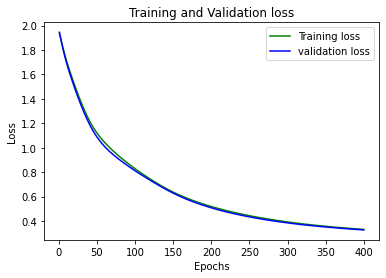

In [360]:
import matplotlib.pyplot as plt

loss_train_l2 = history.history.get('loss')
loss_val = history.history.get('val_loss')

epochs = range(1,401)
plt.plot(epochs, loss_train_l2, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

####  Dropout

In [361]:
num_classes = 3
epochs = 400
batch_size = 256

model = Sequential()
model.add(Dropout(0.4, input_shape=(4,)))
model.add(Dense(4, activation='tanh', name="layer1"))
model.add(Dropout(0.4))
model.add(Dense(32, activation='tanh', kernel_regularizer = 'l2', name="layer2"))
model.add(Dropout(0.4))
model.add(Dense(32, activation='tanh', kernel_regularizer = 'l2', name="layer3"))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer = 'l2', name="layer4"))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer = 'l2'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=400, validation_data=(X_test, y_test))

Epoch 1/400
1/1 [==============================] - 1s 897ms/step - loss: 1.9070 - accuracy: 0.3667 - val_loss: 1.8143 - val_accuracy: 0.4333
Epoch 2/400
1/1 [==============================] - 0s 29ms/step - loss: 1.8887 - accuracy: 0.3750 - val_loss: 1.7972 - val_accuracy: 0.5000
Epoch 3/400
1/1 [==============================] - 0s 30ms/step - loss: 1.9328 - accuracy: 0.4333 - val_loss: 1.7813 - val_accuracy: 0.5000
Epoch 4/400
1/1 [==============================] - 0s 31ms/step - loss: 1.9025 - accuracy: 0.4000 - val_loss: 1.7651 - val_accuracy: 0.5000
Epoch 5/400
1/1 [==============================] - 0s 32ms/step - loss: 1.9221 - accuracy: 0.4083 - val_loss: 1.7487 - val_accuracy: 0.5333
Epoch 6/400
1/1 [==============================] - 0s 30ms/step - loss: 1.8783 - accuracy: 0.4083 - val_loss: 1.7318 - val_accuracy: 0.5333
Epoch 7/400
1/1 [==============================] - 0s 41ms/step - loss: 1.8992 - accuracy: 0.3667 - val_loss: 1.7153 - val_accuracy: 0.6000
Epoch 8/400
1/1 [==

In [362]:
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1/1 [==============================] - 0s 20ms/step - loss: 0.5364 - accuracy: 0.8000
Test loss: 0.5363813042640686
Test accuracy: 0.800000011920929


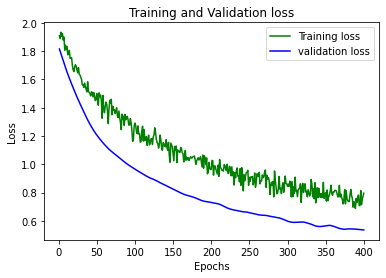

In [363]:
import matplotlib.pyplot as plt

loss_train_dropout = history.history.get('loss')
loss_val = history.history.get('val_loss')

epochs = range(1,401)
plt.plot(epochs, loss_train_dropout, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Comparison

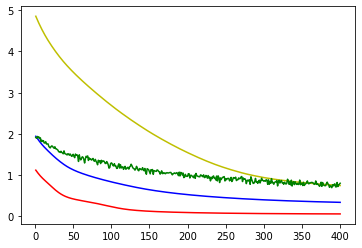

In [366]:
plt.plot(epochs, loss_train,'r', label='Without Regularization')
plt.plot(epochs, loss_train_l1,'y', label='L1 Regularization')
plt.plot(epochs, loss_train_l2,'b', label='L2 Regularization')
plt.plot(epochs, loss_train_dropout, 'g', label='Dropout')